# PDE Group Project 

## American Put Option Problem - Numerical Solution

#### Sona Ghevondyan, Arusyak Hakobyan

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import math
import copy 
from numpy import linalg as LA

## Obstacle Problem: Numerical solution and Visualization

In [736]:
a = 1
N = 50
omega = 1.7 #if 0<omega<2 then the method will converge
err = 0
eps = 0.0000001

In [737]:
x = a*np.arange(-N,N+1)/N
dx = a/N

In [738]:
x

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

In [739]:
f = 1/2 - (x)**2 #obstacle 

In [740]:
zero = np.zeros(2*N+1)

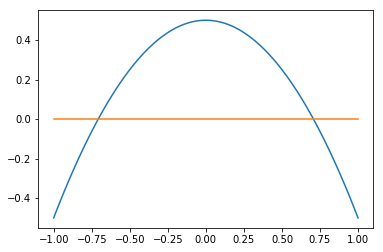

In [741]:
plt.plot(x, f,x,zero)

In [742]:
v = f+1
v[0] = 0
v[2*N] = 0

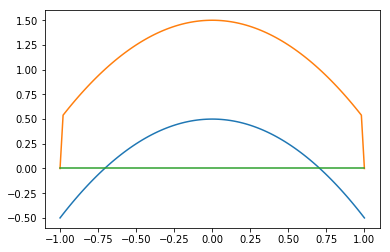

In [743]:
plt.plot(x, f, x, v, x, zero )

In [744]:
#Run for 1 time to initialize v0
for i in range(1,2*N):
        y = (v[i-1]+v[i+1])/2
        y = max(f[i], v[i]+omega*(y-v[i]))
        err += (v[i]-y)*(v[i]-y)
        v[i] = y

In [745]:
#Run until err <= eps
while err > eps*eps:
    for i in range(1,2*N):
        err = 0
        y = (v[i-1]+v[i+1])/2
        y = max(f[i], v[i]+omega*(y-v[i]))
        err += (v[i]-y)*(v[i]-y)
        v[i] = y;

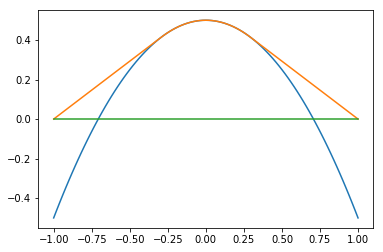

In [746]:
plt.plot(x, f, x, v, x, zero )

## American Option Pricing: Numerical Solution

Ex. American Put with interest rate r = 0.1, volatility sigma = 0.5, Excercise Price E = 10.

In [793]:
M = 10000
dt = 1/M
theta = 0
err1 = 0
r = 0.1
sigma = 0.5

In [805]:
k = r/((1/2)*sigma**2)

In [806]:
alpha #for convergency alpha < 0.5

0.25

In [807]:
def payoff(x,t):
    return math.exp(((1/4)*(k+1)**2)*t) * max(math.exp((1/4)*(k+1)*x) - math.exp((1/2)*(k+1)*x), 0)

In [808]:
g = np.zeros(2*N+)

In [809]:
g

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [817]:
b = np.zeros(2*N+1)

In [818]:
v1 = np.zeros(2*N+1)

In [819]:
a = alpha*theta

In [820]:
tau = 0
alpha = dt/(dx)**2

In [821]:
#initial value
for i in range(0,2*N+1):
    v[i] = payoff(x[i], tau) 

In [849]:
for i in range(1, M+1):
    tau = i*dt
    for j in range(1,2*N-1):
        g[j] = payoff(x[j], tau)
        b[j] = v[j] + alpha*(1-theta)*(v[j+1]+v[j-1]-2*v[j]);
        
    g[0] = payoff(x[0], tau)
    g[2*N] = payoff(x[2*N], tau) 
    b[1] += alpha*theta*g[0]
    b[2*N] += alpha*theta*g[2*N] 
    
    for i in range(1,2*N):
        y1 = (b[i]+a*(v1[i-1]+v1[i+1]))/(1+2*a)
        y1 = max(g[i], v1[i]+omega*(y1-v1[i]))
        err1 += (v1[i]-y1)*(v1[i]-y1)
        v1[i] = y1;
              
    while err1 > eps*eps:
        for i in range(1,2*N):
            err1 = 0
            y1 = (b[i]+a*(v1[i-1]+v1[i+1]))/(1+2*a)
            y1 = max(g[i], v1[i]+omega*(y1-v1[i]))
            err1 += (v1[i]-y1)*(v1[i]-y1)
            v1[i] = y1;

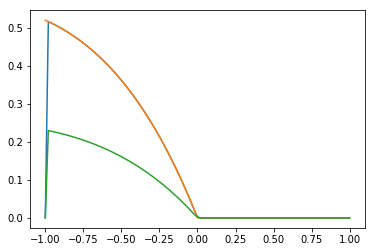

In [853]:
plt.plot(x, v1, x, g, x, b)